<a href="https://colab.research.google.com/github/matdcp/Data-dreamers-/blob/main/DEA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files

# Carica il file manualmente
uploaded = files.upload()  # Ti apparirà un pulsante per selezionare il file

# Carica il file CSV in un DataFrame
ds = pd.read_csv(list(uploaded.keys())[0])  # Prende il nome del file caricato

# Mostra le prime righe del dataset per verificare che sia stato caricato
print(ds.head())


Saving merged_dataset.csv to merged_dataset (3).csv
             id  Start  End                     Label
0   Ventricular      0   11  B-Multi-tissue_structure
1  fibrillation     12   24                         O
2           due     25   28                         O
3            to     29   31                         O
4          long     32   36                         O


In [ ]:
!pip install pandas matplotlib

In [ ]:

import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
import spacy
import pandas as pd
import numpy as np

# DATA EXPLORATORY ANALYSIS (DEA)

# MISSING VALUES

Handling missing values is a critical step in any data preprocessing pipeline, as they can introduce bias or reduce the performance of subsequent analyses and models.

In [ ]:
ds.isnull().sum()

,0
id,18
Start,0
End,0
Label,0


The dataset contains 18 missing values, which could negatively impact subsequent analyses and operations. To address this issue, we will simply remove these missing entries using the pandas dropna() function. This approach ensures a cleaner and more reliable dataset for further processing.

In [ ]:
ds.dropna(inplace=True)

# Classification labels frequency



As the first step of the exploratory analysis, we printed all the named entity recognition (NER) tags along with their frequencies in the biomedical papers under analysis.

In [ ]:
ds['Label'].unique()

array(['B-Multi-tissue_structure', 'O', 'B-Organism_substance',
       'B-Organism_subdivision', 'B-Organ', 'I-Multi-tissue_structure',
       'B-Cellular_component', 'I-Cellular_component', 'B-Cell', 'I-Cell',
       'B-Immaterial_anatomical_entity', 'B-Tissue', 'I-Tissue',
       'B-Pathological_formation', 'B-Anatomical_system',
       'I-Organism_substance', 'I-Anatomical_system',
       'I-Pathological_formation', 'I-Immaterial_anatomical_entity',
       'I-Organ', 'I-Organism_subdivision',
       'B-Developing_anatomical_structure',
       'I-Developing_anatomical_structure'], dtype=object)

In [ ]:

ds['Label'].value_counts()

,count
Label,
O,112934
B-Cell,776
B-Multi-tissue_structure,639
I-Cell,543
B-Organ,381
I-Multi-tissue_structure,372
B-Pathological_formation,368
B-Organism_substance,291
I-Pathological_formation,248


In [ ]:
count_O = ds['Label'].value_counts().get('O',0)
print(count_O)
O_frequency = (count_O / len(ds)) *100
print(O_frequency)

112934
96.01761635123876


In the following, we performed a mapping of the NER tags by grouping the labels of the same class, marked with either I or B, into a single representative label for each class. This was done to provide a clearer representation of the frequency with which each class appears in the text.
Hence, We represented the token distribution per class using histograms, both before and after applying the mapping.

For the purpose of creating an explanatory graphical representation of the frequency, I excluded the Outside (O) NER tags from the mapping. This decision was made because, as observed in the output of the counts, there is a clear and significant imbalance, with O accounting for 112,952 occurrences, representing 96% of the total NER tags.

In [ ]:
# mapping lables

mapping = {'B-Multi-tissue_structure': 'Multi-tissue_structure',
           'I-Multi-tissue_structure': 'Multi-tissue_structure',
           'B-Organism_substance':'Organism_substance',
           'I-Organism_substance':'Organism_substance',
           'B-Organism_subdivision':'Organism_subdivision',
           'I-Organism_subdivision':'Organism_subdivision',
           'B-Organ':'Organ',
           'I-Organ':'Organ',
           'B-Cellular_component':'Cellular_component',
           'I-Cellular_component':'Cellular_component',
           'B-Cell':'Cell',
           'I-Cell':'Cell',
           'B-Immaterial_anatomical_entity':'Immaterial_anatomical_entity',
           'I-Immaterial_anatomical_entity':'Immaterial_anatomical_entity',
           'B-Tissue':'Tissue',
           'I-Tissue':'Tissue',
           'B-Pathological_formation':'Pathological_formation',
           'I-Pathological_formation':'Pathological_formation',
           'B-Anatomical_system':'Anatomical_system',
           'I-Anatomical_system':'Anatomical_system',
           'B-Developing_anatomical_structure':'Developing_anatomical_structure',
           'I-Developing_anatomical_structure':'Developing_anatomical_structure',
           'O': 'O'

}

In [ ]:
mapped_ds = ds.copy()
ds1 = ds.copy()
mapped_ds['Label'] = mapped_ds['Label'].map(mapping)
mapped_ds_without_O= mapped_ds[mapped_ds['Label'] != 'O']
ds_without_O = ds1[ds1['Label'] != 'O']

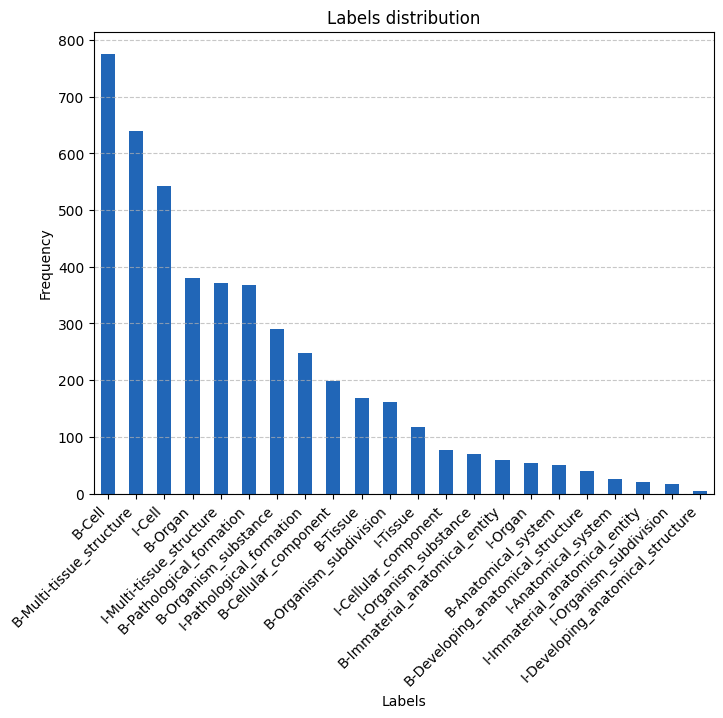

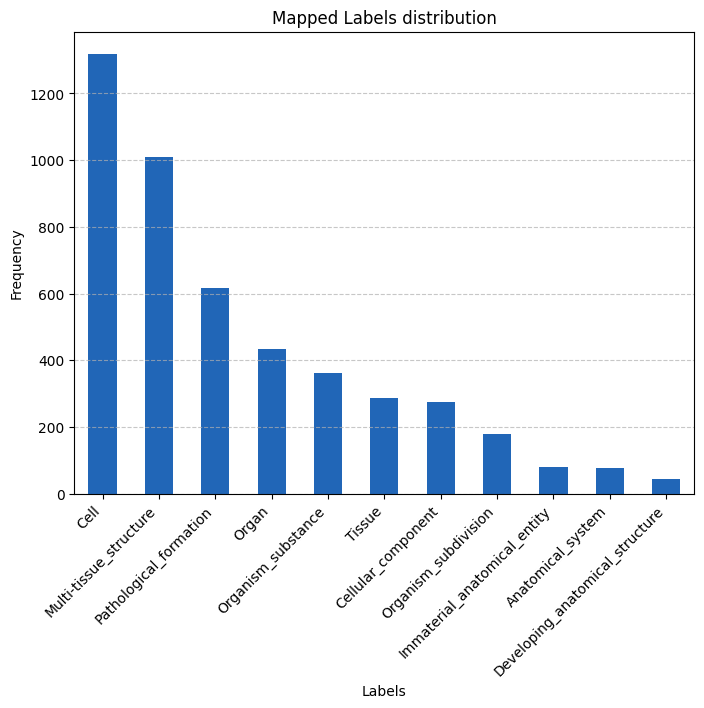

In [ ]:
label_counts_mapped = mapped_ds_without_O['Label'].value_counts()
label_counts = ds_without_O['Label'].value_counts()

plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color='#2166b7')
plt.title('Labels distribution')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Ruota le etichette per leggibilità
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(8, 6))
label_counts_mapped.plot(kind='bar', color='#2166b7')
plt.title('Mapped Labels distribution')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Ruota le etichette per leggibilità
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Based on the histograms, before the mapping, the dataset exhibits a higher granularity with distinct "B-" and "I-" prefix labels representing token positions in entities. After the mapping, the labels are consolidated into broader categories, reducing the overall complexity and improving the class balance. This transformation helps simplify the classification task while retaining the essential distinctions needed for entity extraction.

# MOST FREQUENT TOKENS

Using the RegexpTokenizer(r'\w+') from NLTK, which employs the regular expression \w+ to extract alphanumeric sequences, we removed delimiters such as punctuation and other undesired symbols. This step was taken to focus the subsequent analysis on identifying semantic patterns and examining token frequency by class.

Following this, we leveraged spaCy to remove default stop words provided by the library. Since stop words often dominate token frequency counts, their removal aligns with the rationale behind eliminating delimiters: to ensure that the analysis emphasizes meaningful and semantically relevant tokens.

In [ ]:
#delimiters
tokenizer = RegexpTokenizer(r'\w+')
ds['id'] = ds['id'].apply(lambda x: ' '.join(tokenizer.tokenize(str(x))))

In [ ]:
#stopwords
nlp = spacy.load("en_core_web_sm")
print(nlp.Defaults.stop_words)

{'when', 'these', 'give', 'ca', 'therefore', 'before', 'any', 'how', 'meanwhile', 'such', 'without', 'three', 'mostly', 'seeming', 'never', 'anyone', 'whence', 'move', 'of', 'seemed', 'yours', 'and', 'anyhow', 'so', 'first', 'off', '‘ll', 'whereupon', 'over', 'always', 'mine', 'four', 'while', 'itself', 'however', 'ours', 'someone', 'that', 'a', 'namely', 'you', 'fifty', 'even', 'now', 'as', 'although', 'beside', '’m', 'somewhere', 'other', 'ever', 'above', 'part', 'indeed', 'hers', 'n‘t', 'really', 'nevertheless', 'nowhere', 'my', 'becoming', 'same', 'whereas', 'into', 'see', 'her', 'can', 'latter', 'beforehand', 'but', 'ourselves', 'me', 'to', 'cannot', '’s', 'she', 'some', 'perhaps', 'within', 'this', "'s", 'every', 'his', 'side', 'thru', 'everywhere', 're', 'whom', 'will', 'except', 'around', 'whither', 'make', 'himself', 'further', 'enough', 'get', 'amount', 'very', 'say', 'call', 'something', 'most', 'take', 'nor', 'until', 'put', 'still', 'must', 'various', 'seems', 'anyway', 'd

In [ ]:
def remove_stop_words(text):
    doc = nlp(text)
    return ' '.join([token.text for token in doc if not token.is_stop])

ds['id'] = ds['id'].apply(remove_stop_words)

KeyboardInterrupt: 

In [ ]:
most_common_tokens = ds['id'].value_counts().head(10)
print(most_common_tokens)

id
            56561
1             551
0             499
5             404
2             400
patients      323
3             301
4             236
cells         236
6             195
Name: count, dtype: int64


Following, we represented the most frequent tokens for each label individually. This step helps to identify distinctive terms associated with specific labels, providing insights into the linguistic patterns that could be useful for model training and improving classification performance.

In [ ]:

# Conta i token più frequenti per ciascuna classe
most_common_tokens_per_class = (
    ds.groupby('Label')['id']
    .value_counts()  # Conta i token per classe
    .groupby(level=0)  # Raggruppa di nuovo per classe
    .head(5)  # Prendi i primi 5 token per classe
)

# Trasforma in DataFrame con tutte le informazioni necessarie
most_common_tokens = most_common_tokens_per_class.reset_index(name='Frequency')

# Verifica che il risultato sia un DataFrame
print(type(most_common_tokens))  # Dovrebbe essere <class 'pandas.core.frame.DataFrame'>
print(most_common_tokens.head())  # Verifica la struttura


<class 'pandas.core.frame.DataFrame'>
               Label             id  Frequency
0  Anatomical_system         system         16
1  Anatomical_system    respiratory          9
2  Anatomical_system  corticospinal          7
3  Anatomical_system        nervous          7
4  Anatomical_system   neurological          7


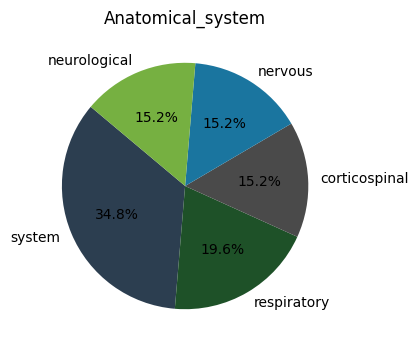

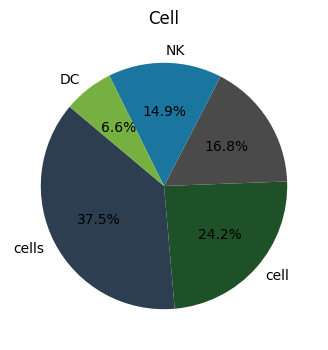

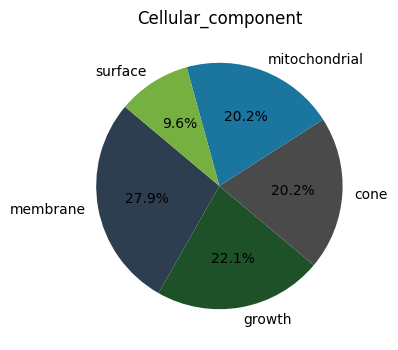

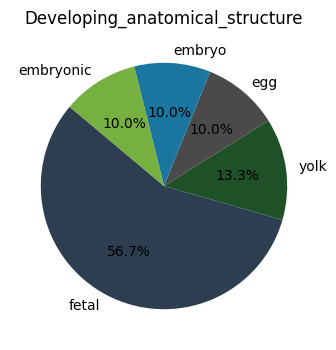

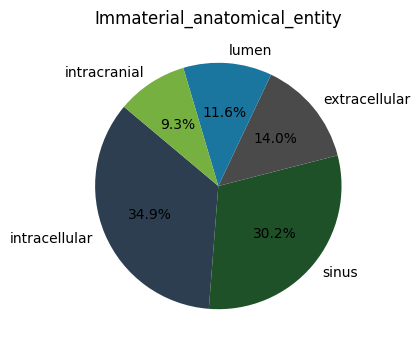

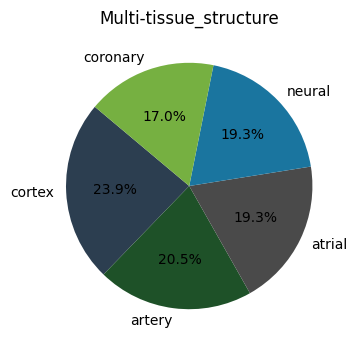

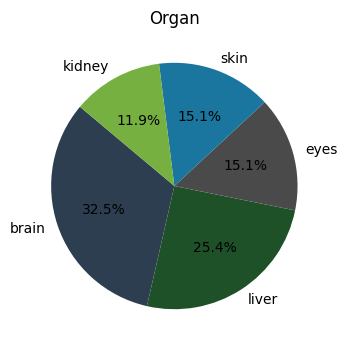

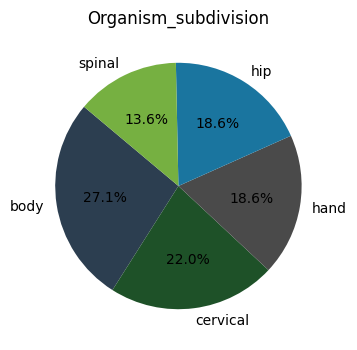

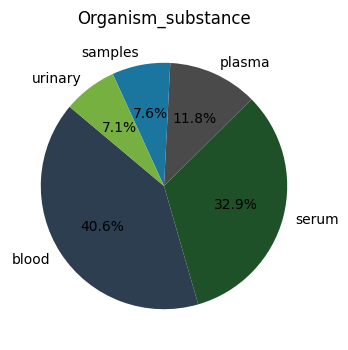

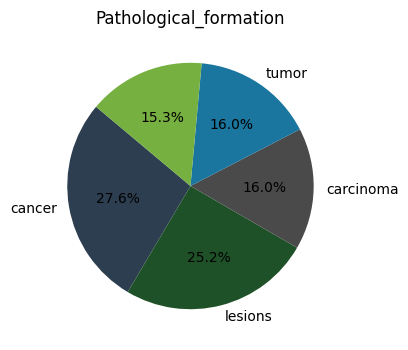

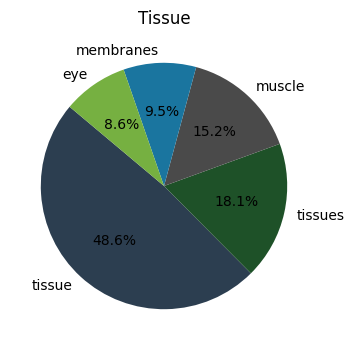

In [ ]:
import matplotlib.pyplot as plt


for label in most_common_tokens['Label'].unique():
    class_tokens = most_common_tokens[most_common_tokens['Label'] == label]
    plt.figure(figsize=(4, 4))
    plt.pie(
        class_tokens['Frequency'],
        labels=class_tokens['id'],
        autopct='%1.1f%%',
        startangle=140,
        colors = ['#2C3E50', '#1E5128', '#4A4A4A', '#1A759F', '#76B041',
                          '#3C3C3C', '#1F4E5F', '#9DA5B0', '#2B9348', '#5C5C5C']
    )
    plt.title(label)
    plt.show()




Ecco una lista ordinata di step per completare la tua Data Exploratory Analysis (DEA):

1. Analisi delle distribuzioni statistiche
Calcola e rappresenta graficamente:
La distribuzione della lunghezza delle frasi.
La distribuzione della lunghezza dei token.
La distribuzione delle label (classi) prima e dopo il mapping.
Frequenza cumulativa delle classi per verificare eventuali classi sbilanciate.

2. Analisi linguistica del corpus
POS tagging: Analizza e visualizza la distribuzione delle Part-of-Speech (POS) nei dati per comprendere la struttura linguistica delle frasi.
Dependency parsing: Studia le relazioni grammaticali tra i token (es. soggetto-verbo-oggetto) e verifica se alcune strutture sintattiche sono associate a determinate classi.
Analisi dei lemmi: Analizza i lemmi più frequenti per verificare se ci sono variazioni significative rispetto ai token.
3. Word Cloud per le classi
Crea una Word Cloud per ogni classe per visualizzare rapidamente i termini più rappresentativi (già hai analizzato i token frequenti, ma la Word Cloud aggiunge una componente visiva utile).
4. Analisi delle n-gram
Studia i bigrammi e i trigrammi più frequenti per ogni classe e rappresentali graficamente. Questo può aiutarti a cogliere combinazioni di parole specifiche per ogni entità.
5. Riduzione dimensionale del testo
Utilizza LDA (Latent Dirichlet Allocation) o NMF (Non-negative Matrix Factorization) per analizzare i temi latenti nel corpus e vedere se corrispondono a pattern di classificazione già noti.
Rappresenta graficamente i temi latenti con t-SNE o UMAP per una migliore visualizzazione.

6. Report finale DEA. fare una dashbord
Organizza i risultati in un report visivo e descrittivo, includendo:
Grafici di distribuzione e tabelle riassuntive.
Le principali intuizioni derivate da ciascun passo.
Considerazioni sui pattern osservati e il loro impatto sull’implementazione dei modelli successivi.
